# Making plots visualizing the model performance

In [7]:
%load_ext autoreload
%autoreload 2
import joblib 
import numpy as np

import matplotlib.pyplot as plt

from colorml.utils.utils import plot_prediction_dist, read_pickle

%matplotlib inline

In [3]:
model_median = joblib.load('../results/gbm/regressor_medianrun_2020_06_08_12_59_1591613951.joblib')
model_01 = joblib.load('../results/gbm/regressor_0_1run_2020_06_08_12_59_1591613951.joblib')
model_09 = joblib.load('../results/gbm/regressor_0_9run_2020_06_08_12_59_1591613951.joblib')
model_mean = joblib.load('../results/gbm/regressor_meanrun_2020_06_08_12_59_1591613951.joblib')

X_test = np.load('../results/gbm/X_test_run_2020_06_08_12_59_1591613951.npy')
X_train = np.load('../results/gbm/X_train_run_2020_06_08_12_59_1591613951.npy')
y_train = np.load('../results/gbm/y_train_run_2020_06_08_12_59_1591613951.npy')
y_test = np.load('../results/gbm/y_test_run_2020_06_08_12_59_1591613951.npy')
names = np.load('../results/gbm/y_names_run_2020_06_08_12_59_1591613951.npy', allow_pickle=True)

In [4]:
quantile01_prediction = model_01.predict(X_test)
quantile09_prediction = model_09.predict(X_test)

median_prediction = model_median.predict(X_test)

mean_prediction = model_mean.predict(X_test)

In [5]:
augmentation_dict = read_pickle('../data/augment_dict.pkl')

/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/colorml/utils/utils.py:423: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  prediction = np.median(result, axis=0)


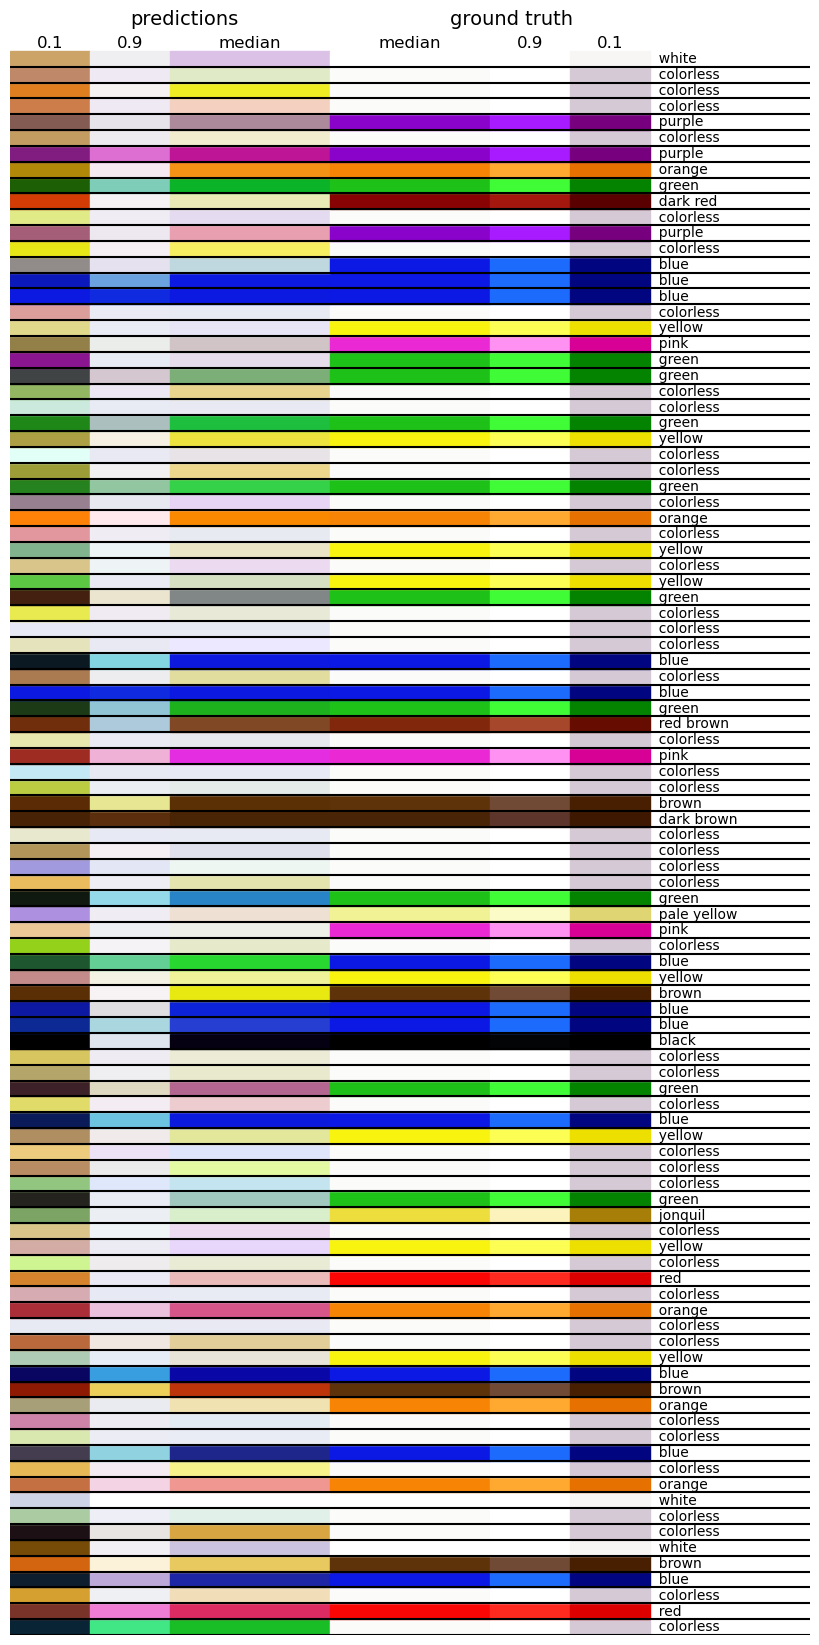

In [103]:
plot_prediction_dist(quantile01_prediction * 255, 
                     median_prediction * 255, 
                     quantile09_prediction * 255,
                     names,
                     augmentation_dict, 
                     100,
                     outname='../results/color_examples.pdf'
                    )

In [50]:
from colorml.utils.utils import get_delta_e, pairwise_delta_es

### Calculate baseline colordistances from the survey

In [25]:
color_delta_es = {}
means = []

for k,v in augmentation_dict.items():
    colors = len(v)
    meanc = []
    for i in range(colors):
        for j in range(colors): 
            if j>i: 
                meanc.append(get_delta_e(v[i], v[j], upscaled=True))
    color_delta_es[k] = meanc
    means.extend(meanc)

In [26]:
color_delta_es_medians = {}

for k, v in color_delta_es.items():
    color_delta_es_medians[k] = np.median(v)

In [27]:
smaller_5 = (np.array(list(color_delta_es_medians.values())) < 5)

In [28]:
5/len(color_delta_es_medians) * 100

3.571428571428571

In [29]:
np.array(list(color_delta_es_medians.keys()))[smaller_5]

array(['black', 'red', 'white', 'whiteish colorless', 'yellow'],
      dtype='<U18')

In [30]:
np.mean(means)

12.10887233993671

In [31]:
np.median(means)

9.830288903449254

In [105]:
differences = pairwise_delta_es(median_prediction, y_test)

In [106]:
len(np.where(np.array(differences) < 5)[0]) / len(differences) * 100

31.25

In [108]:
np.median(differences)

12.886227404292082

In [94]:
import seaborn as sns

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams['font.family'] = 'sans-serif'

In [91]:
dummy_median = joblib.load('../results/dummy_median.joblib')
dummy_mean = joblib.load('../results/dummy_mean.joblib')

In [92]:
dummy_median_prediction = dummy_median.predict(X_test)
dummy_mean_prediction = dummy_mean.predict(X_test)

In [63]:
dummy_median_differences = pairwise_delta_es(dummy_median_prediction, y_test)
dummy_mean_differences = pairwise_delta_es(dummy_mean_prediction, y_test)

In [81]:
current_palette = sns.color_palette()

In [84]:
current_palette[3].

(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)

In [85]:
colors = ["#1b9e77", "#d95f02", "#7570b3"] # colorbrewer

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  app.launch_new_instance()


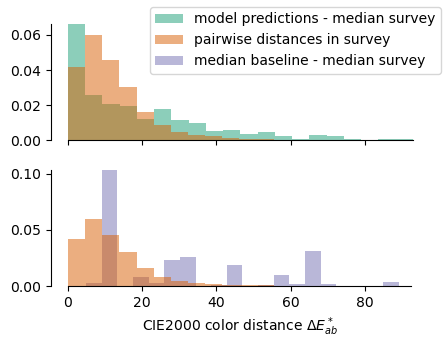

In [101]:
fig, ax = plt.subplots(2,1, figsize=(4.5,3.5), sharex=True)

ax[0].hist(differences, density=True, alpha=.5, label='model predictions - median survey', bins=20, color=colors[0])
ax[0].hist(means, density=True, alpha=.5, label='pairwise distances in survey', bins=20, color=colors[1])

ax[1].hist(dummy_median_differences, density=True, alpha=.5, label='median baseline - median survey', bins=20, 
           color=colors[2])
ax[1].hist(means, density=True, alpha=.5, label='_nolegend_', bins=20, color=colors[1])
#ax.hist(dummy_mean_differences, density=True, alpha=.5, label='mean baseline  - median survey', bins=20)


for a in ax:
    a.spines['top'].set_color('none')
    a.spines['right'].set_color('none')
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)

ax[1].set_xlabel(r'CIE2000 color distance $\Delta E^*_{ab}$')
fig.legend()

fig.tight_layout()

fig.savefig('../results/delta_e_plot.pdf', bbox_inches='tight')